In [276]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [277]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [278]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [279]:
cust_filter = data['cust_id'] == 'klant_266'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2018-01-01']

In [280]:
data.head()

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,,
2016-01-01,2016-01-01,klant_266,0.0,0.0,train
2016-01-04,2016-01-04,klant_266,172.0,44.0,train
2016-01-05,2016-01-05,klant_266,44.0,54.0,train
2016-01-06,2016-01-06,klant_266,54.0,53.0,train
2016-01-07,2016-01-07,klant_266,53.0,43.0,train


In [281]:
data.drop(['procesdag'], axis='columns', inplace=True)

In [282]:
data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2016-01-01,klant_266,0.0,0.0,train
2016-01-04,klant_266,172.0,44.0,train
2016-01-05,klant_266,44.0,54.0,train
2016-01-06,klant_266,54.0,53.0,train
2016-01-07,klant_266,53.0,43.0,train


In [283]:
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [284]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_266,0.0,train
2016-01-04,klant_266,172.0,train
2016-01-05,klant_266,44.0,train
2016-01-06,klant_266,54.0,train
2016-01-07,klant_266,53.0,train


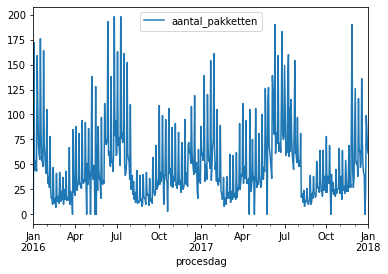

In [285]:
data.plot()

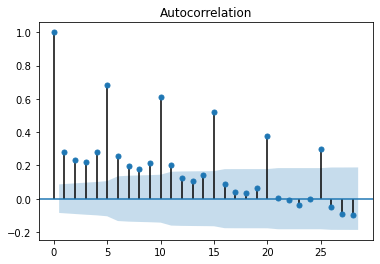

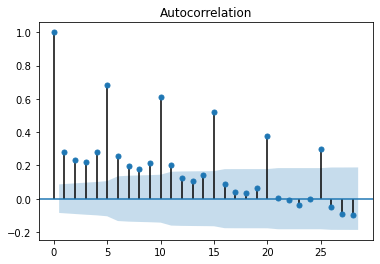

In [286]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [287]:
data_diff = data['aantal_pakketten'].diff()

In [288]:
data_diff=data_diff[1:]
data_diff.head()

procesdag
2016-01-04    172.0
2016-01-05   -128.0
2016-01-06     10.0
2016-01-07     -1.0
2016-01-08    -10.0
Name: aantal_pakketten, dtype: float64

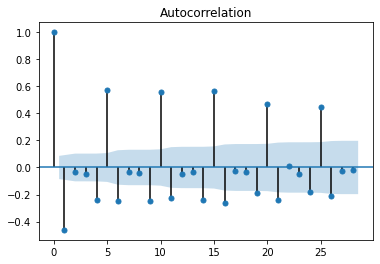

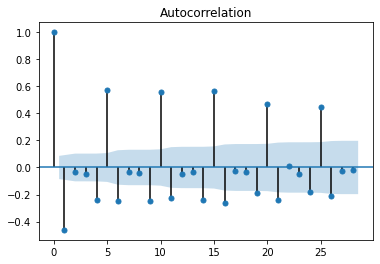

In [289]:
plot_acf(data_diff)

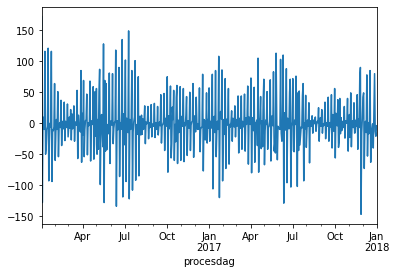

In [290]:
data_diff.plot()

In [291]:
X= data_diff.values #data['aantal_pakketten'].values
train= X [0:500] # 500 data train
test = X[500:] #22 test data
predictions = []



# AR Model


In [292]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar= AR(train)
model_ar_fit=model_ar.fit()

In [293]:
predictions=model_ar_fit.predict(start=499, end=522)

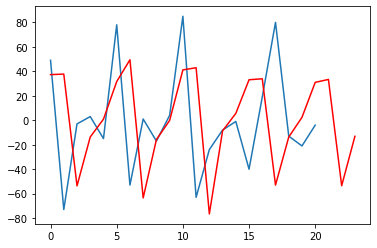

In [294]:
plt.plot(test)
plt.plot(predictions, color= 'red')

# arima

In [295]:
from statsmodels.tsa.arima_model import ARIMA

In [296]:
#model_arima = ARIMA(train,order=(1,1,0))
#model_arima_fit=model_arima.fit()

In [297]:
#predictions=model_arima_fit.predict(start=499, end=522)
#predictions

In [298]:
#plt.plot(test)
#plt.plot(predictions, color= 'red')

Text(0.5, 1.0, 'Arima model 2016-2018')

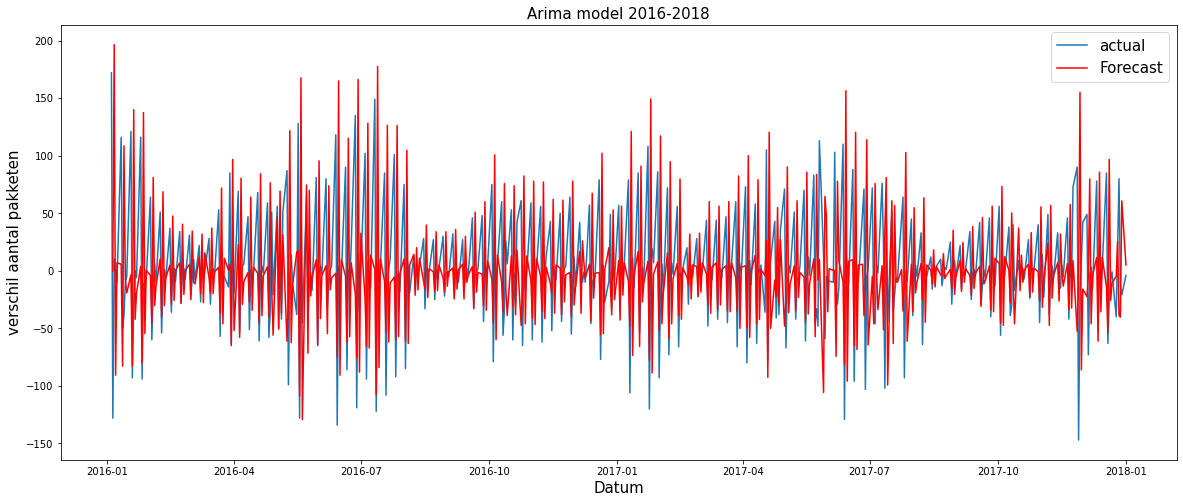

In [299]:
#fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data_diff, order=(1,1,0))# ARIMA(data['aantal_pakketten'], order=(1,0,0)
ax = plt.gca()
results = model.fit() 
plt.plot(data_diff)#(data['aantal_pakketten']
plt.plot(results.fittedvalues, color='red',alpha=1)
ax.legend(['actual', 'Forecast'],fontsize=15)
plt.xlabel('Datum',fontsize= 15)
plt.ylabel('verschil aantal pakketen',fontsize= 15)
plt.title('Arima model 2016-2018',fontsize= 15)

Text(0.5, 1.0, 'zelf voorspeld door het model')

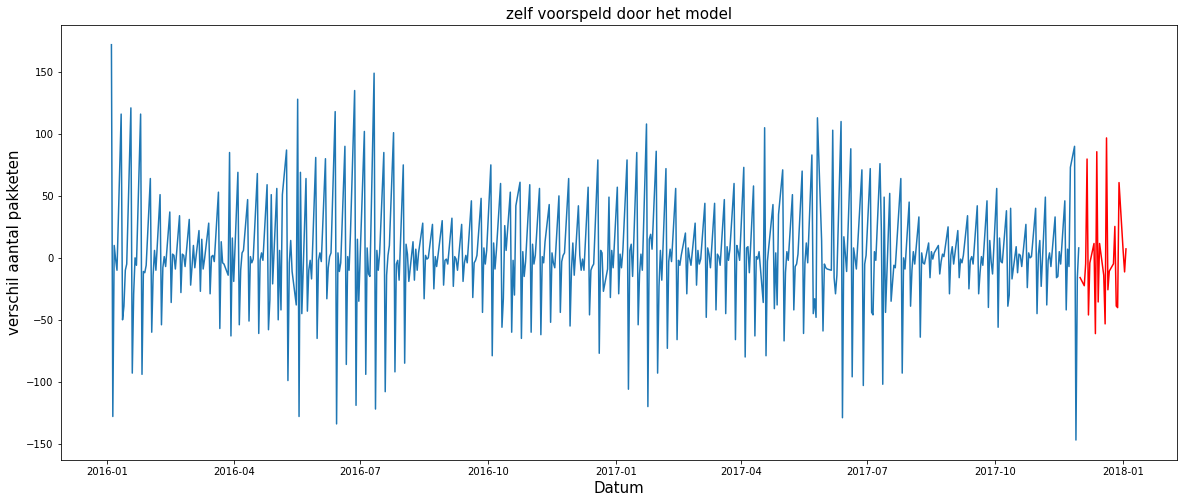

In [300]:
# forecast quick and dirty
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(data_diff)
x = results.predict(start=(499), end=(522), dynamic=False)

plt.plot(data_diff[:499])
plt.plot(x, color='r')
plt.xlabel('Datum',fontsize= 15)
plt.ylabel('verschil aantal pakketen',fontsize= 15)
plt.title('zelf voorspeld door het model',fontsize= 15)